<a href="https://colab.research.google.com/github/DjNaGuRo/Hands-on-DL/blob/fashion_mnist_classifier/california_housing_price_regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# Import cells
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd

In [8]:
#Download dataset
housing = fetch_california_housing()

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    housing.data,
    housing.target
)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.3)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test_full = scaler.transform(X_test_full)

In [69]:
## Define the regressor model
model = Sequential([
    Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    Dense(1)
])

# Compile model (Definition of the loss function and the optimizer)
model.compile(loss="mean_squared_error", optimizer="sgd")

# Train model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

# Evaluate the trained model
mse_test = model.evaluate(X_test_full, y_test_full)

# Make some predictions
X_new = X_test_full[:3]
y_pred = model.predict(X_new)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.8841 - val_loss: 0.5407
Epoch 2/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5906 - val_loss: 0.4932
Epoch 3/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4778 - val_loss: 0.4597
Epoch 4/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.4589 - val_loss: 0.4431
Epoch 5/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.4452 - val_loss: 0.4388
Epoch 6/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.4118 - val_loss: 0.4492
Epoch 7/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4130 - val_loss: 0.4135
Epoch 8/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3989 - val_loss: 0.4080
Epoch 9/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3827 - val_loss: 0.4061
Epoch 10/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3949 - val_loss: 0.4081
Epoch 11/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4120 - val_loss: 0.3963
Epoch 12/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/ste

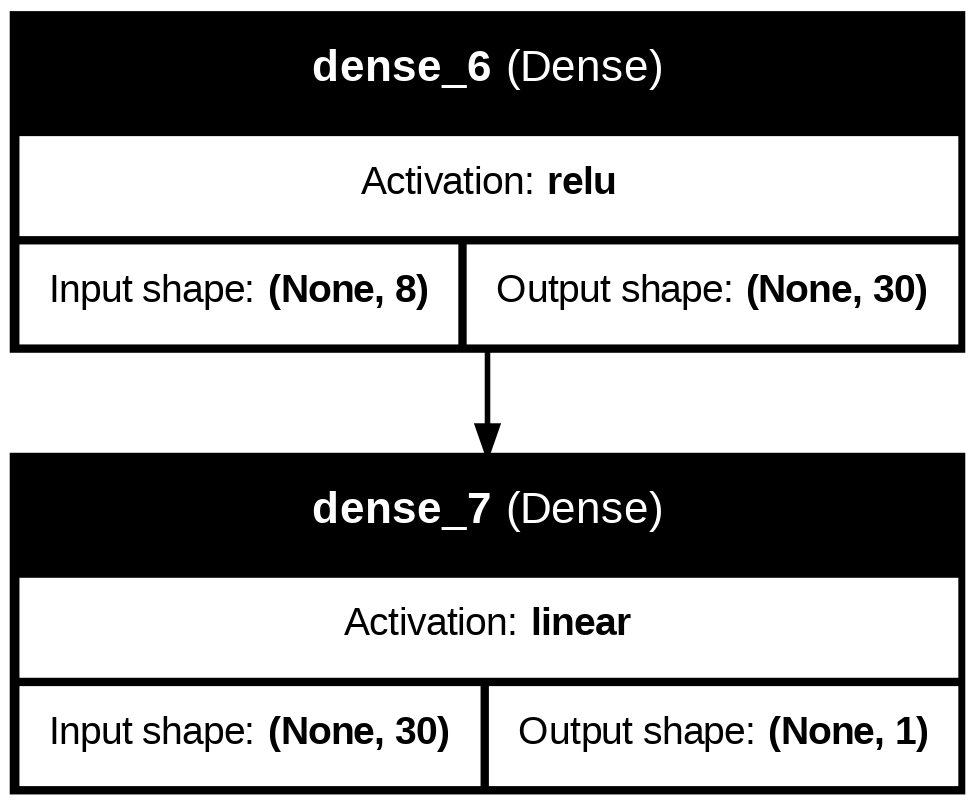

In [23]:
keras.utils.plot_model(model, "california_housing_regressor_model.png", show_shapes=True, show_layer_names=True, show_layer_activations=True)

In [53]:
##Usage of non-sequential models

### With only one input and one output
input_data = Input(shape=X_train.shape[1:])
hidden1 = Dense(30, activation="relu")(input_data)
hidden2 = Dense(30, activation="relu")(hidden1)
concat_1_1 = Concatenate()([input_data, hidden2])
output_1_1 = Dense(1)(concat_1_1)
complex_model_1_1 = keras.Model(inputs=[input_data], outputs=[output_1_1])

### With two inputs and one output
input_A = Input(shape=[5], name="wide_input")
hidden_layer_1 = Dense(10, activation="relu", name='h_wide_layer')(input_A)
input_B = Input(shape=[6], name="deep_input")
hidden_layer_2 = Dense(30, activation="relu", name='h_deep_layer_1')(input_B)
hidden_layer_3 = Dense(30, activation="relu", name='h_deep_layer_2')(hidden_layer_2)
concat_2_1 = Concatenate()([hidden_layer_1, hidden_layer_3])
output_2_1 = Dense(1, name="output")(concat_2_1)
complex_model_2_1 = keras.Model(inputs=[input_A, input_B], outputs=[output_2_1])

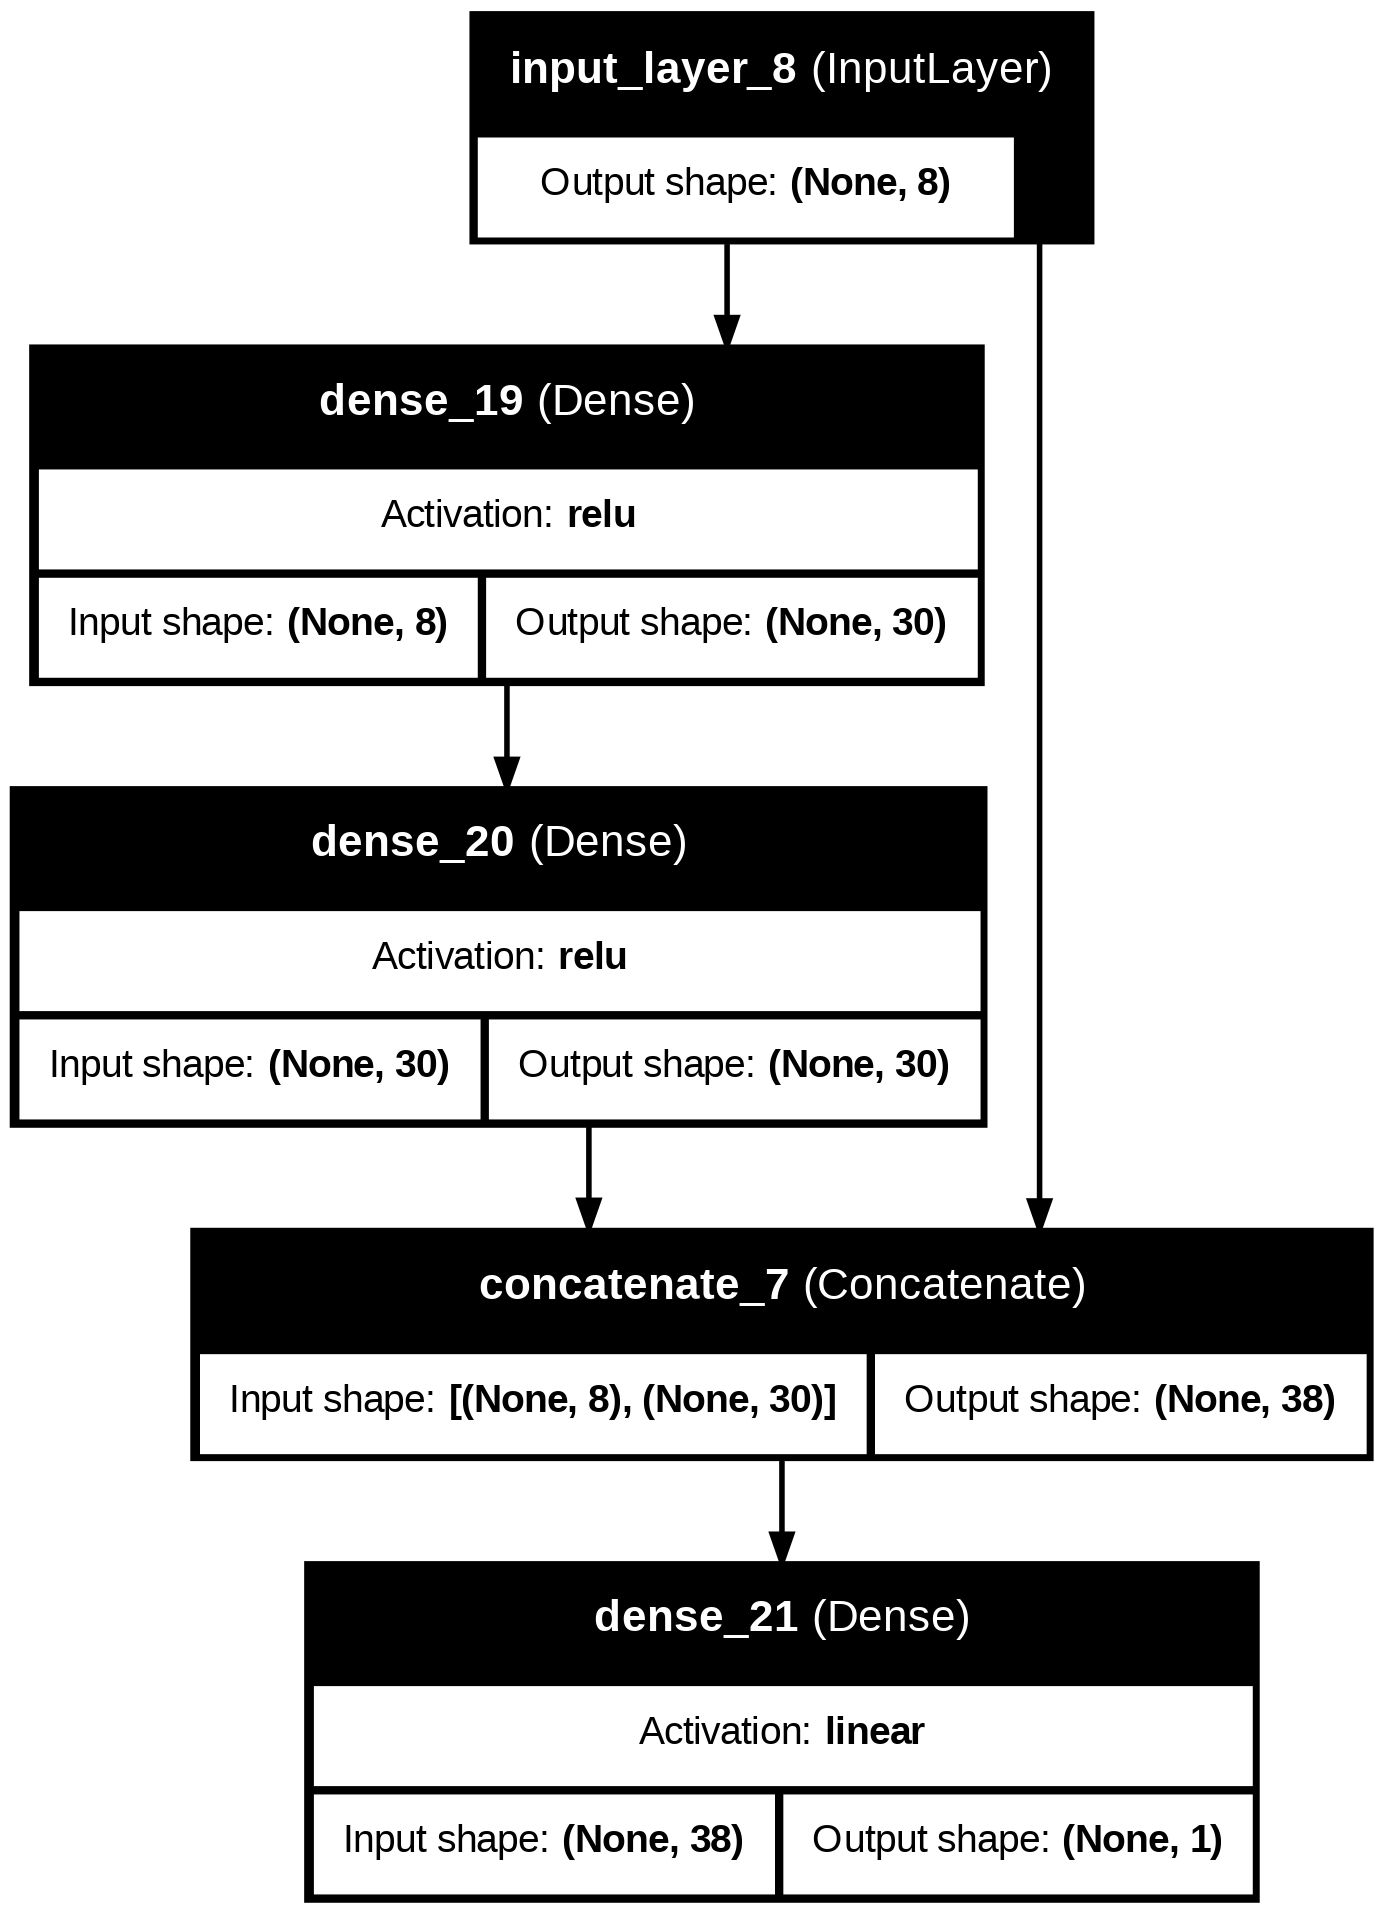

In [54]:
keras.utils.plot_model(complex_model_1_1, "california_housing_regressor_complexmodel1_1.png", show_shapes=True, show_layer_names=True, show_layer_activations=True)

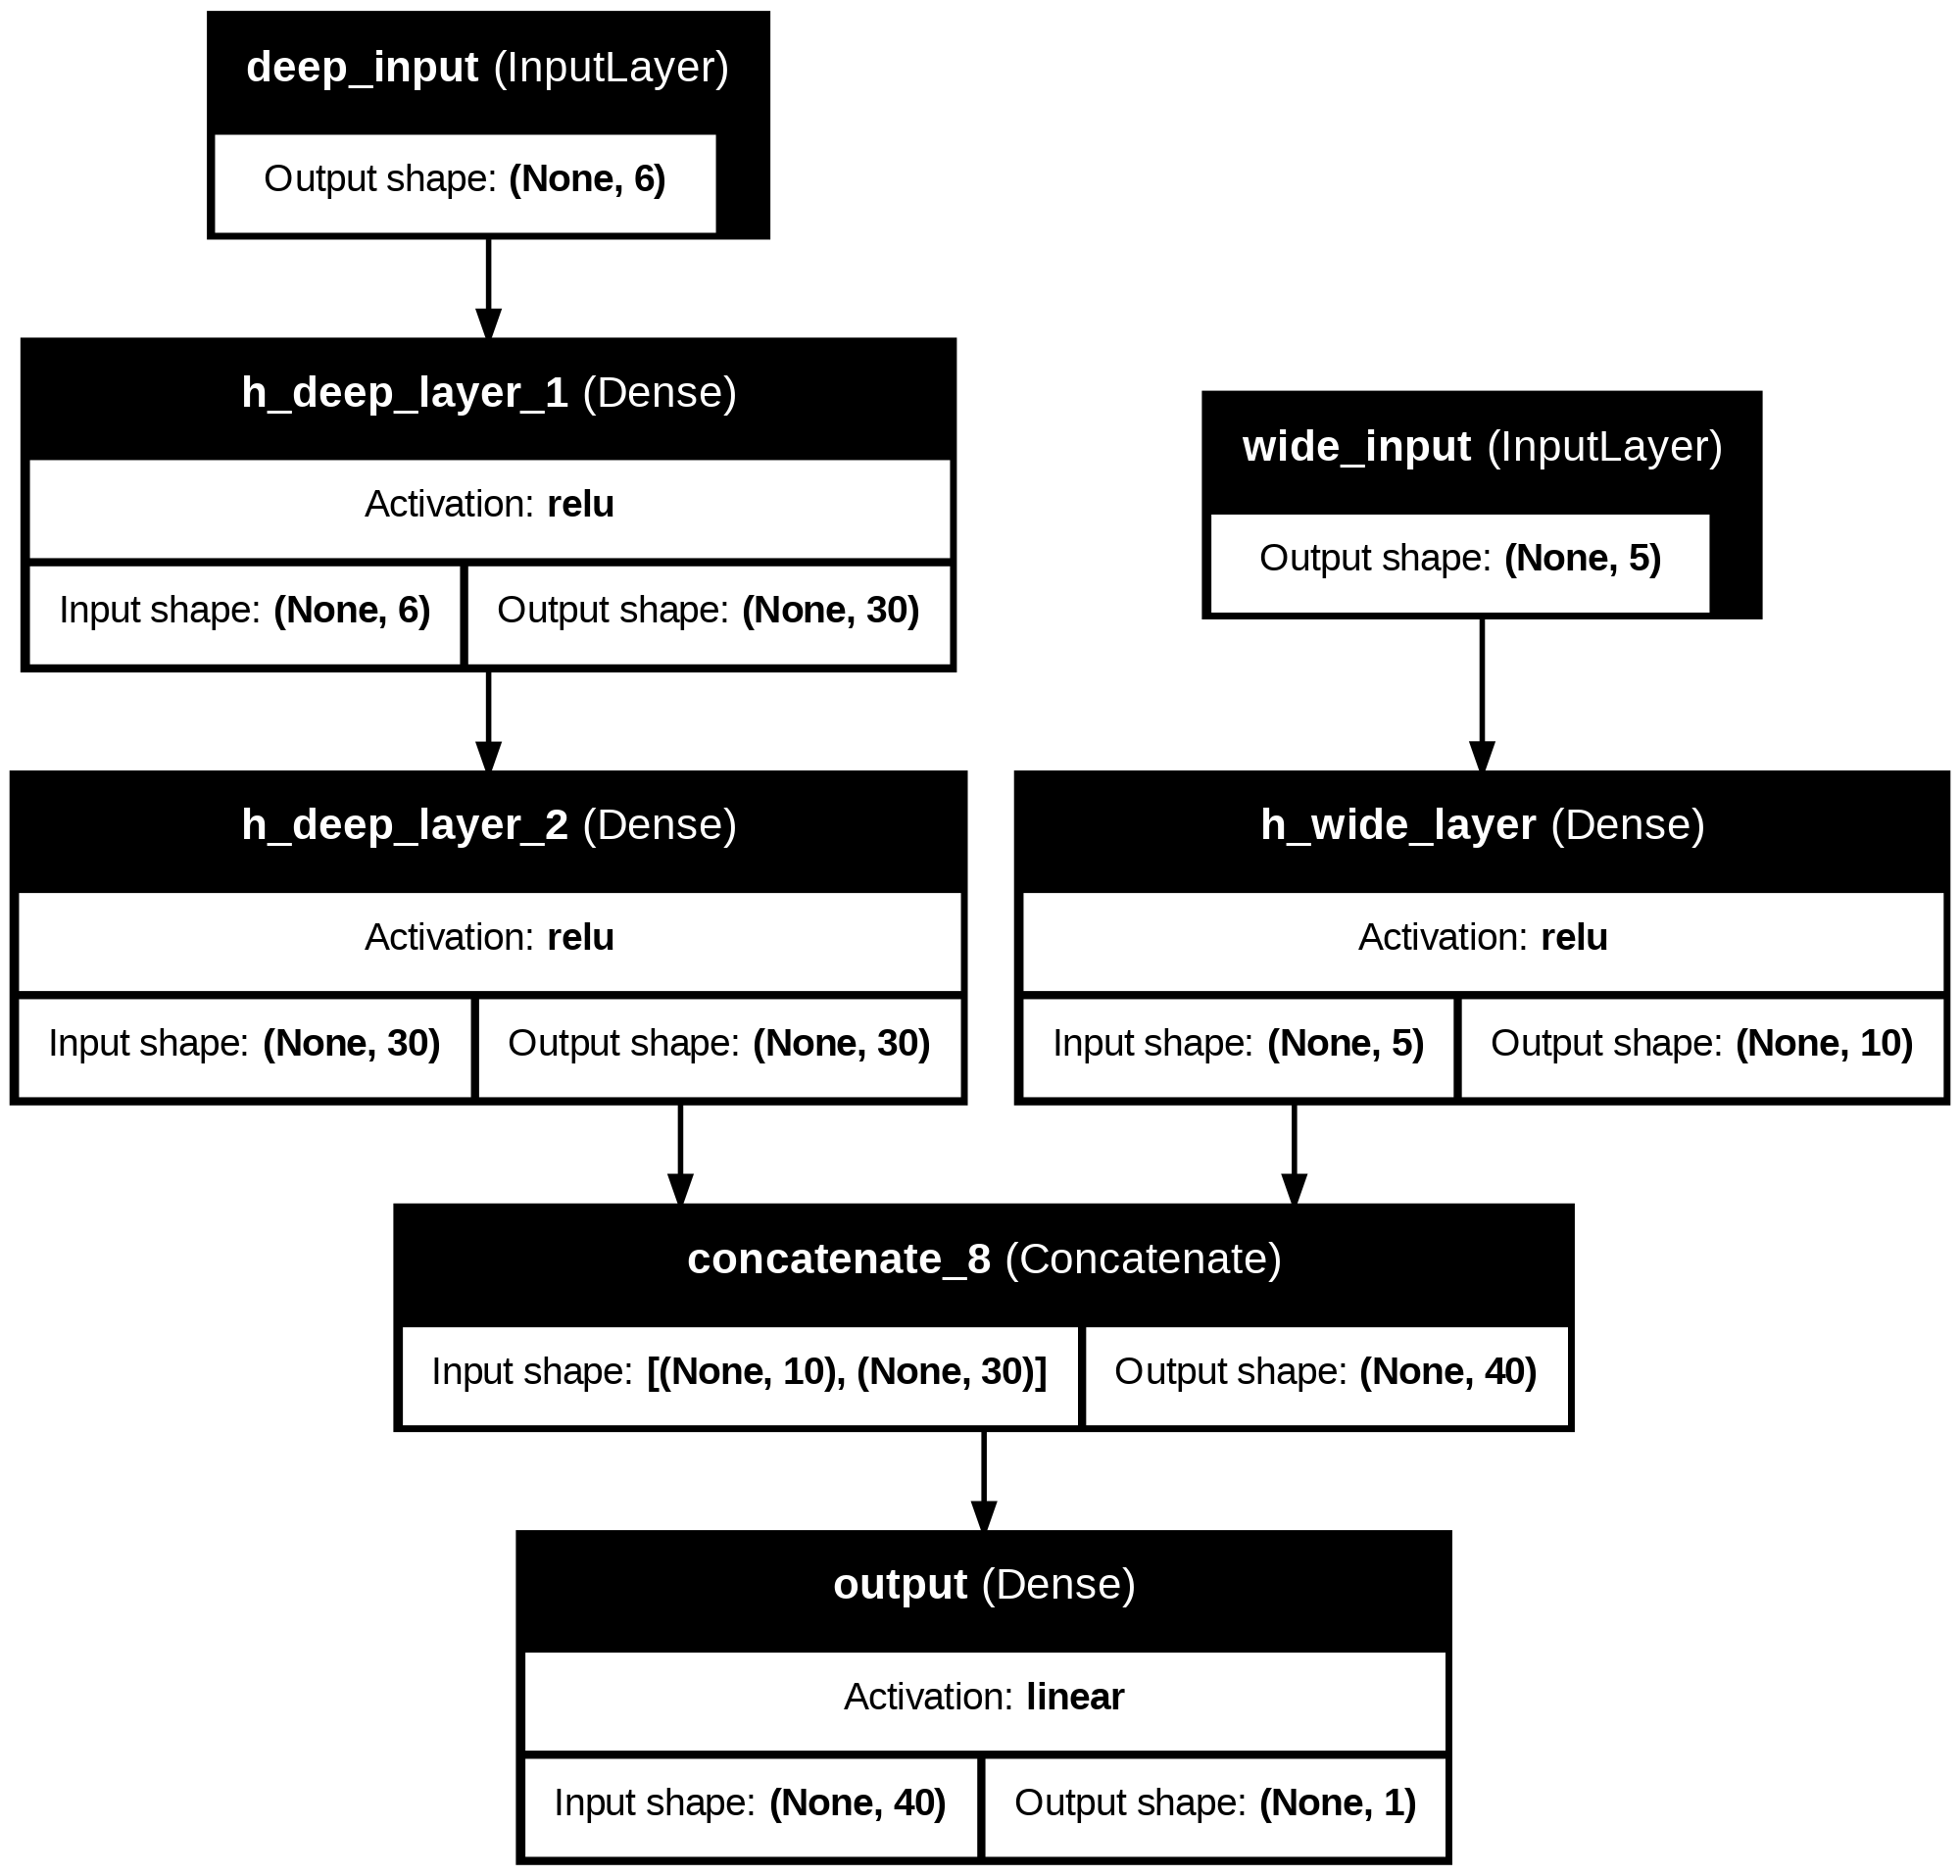

In [55]:
keras.utils.plot_model(complex_model_2_1, "california_housing_regressor_complexmodel2_1.png", show_shapes=True, show_layer_names=True, show_layer_activations=True)

In [56]:
# Compile the first complex model
complex_model_1_1.compile(loss="mse", optimizer="sgd")

# Train
history = complex_model_1_1.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

# Evaluate the model
mse_test_complex_1_1 = complex_model_1_1.evaluate(X_test_full, y_test_full)

# Predict the first three houses price
y_pred_complex_1_1 = complex_model_1_1.predict(X_new)
print(y_pred_complex_1_1)

Epoch 1/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1911 - val_loss: 0.6957
Epoch 2/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4305 - val_loss: 0.6541
Epoch 3/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2840 - val_loss: 0.5257
Epoch 4/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 27.2310 - val_loss: 5.4324
Epoch 5/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1632.7560 - val_loss: 257.2577
Epoch 6/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2721.5928 - val_loss: 688.4184
Epoch 7/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 52902.3750 - val_loss: 1809.9617
Epoch 8/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 41717.4844 - val_loss: 4835.0063
Epoch 9/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 164062.7812 - val_loss: 12479.7559
Epoch 10/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 126549.8438 - val_loss: 32081.6719
Epoch 11/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 110286.9844 - val_loss: 91427.4922


In [57]:
#Compile the second complexe model
complex_model_2_1.compile(loss="mse", optimizer="sgd")

#Train
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test_full[:, :5], X_test_full[:, 2:]
X_new_A, X_new_B = X_new[:, :5], X_new[:, 2:]
print(f"Shape of X_train_A: {X_train_A.shape}")
print(f"Shape of X_train_B: {X_train_B.shape}")

# The usage of a dictionary {"wide_input": X_train_A, "deep_input": X_train_B}
# instead of the tuple (X_train_A, X_train_B) causes a strange input shape error for hidden deep layer
history = complex_model_2_1.fit((X_train_A, X_train_B),
                                y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))

#Evaluate the model
mse_test_complex_2_1 = complex_model_2_1.evaluate((X_test_A, X_test_B), y_test_full)

#Predict the first three houses price
y_pred_complex_2_1 = complex_model_2_1.predict((X_new_A, X_new_B))

Shape of X_train_A: (10836, 5)
Shape of X_train_B: (10836, 6)
Epoch 1/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4109 - val_loss: 0.5181
Epoch 2/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4872 - val_loss: 0.4851
Epoch 3/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5203 - val_loss: 0.4504
Epoch 4/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4322 - val_loss: 0.4383
Epoch 5/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4052 - val_loss: 0.4159
Epoch 6/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4168 - val_loss: 0.4242
Epoch 7/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3944 - val_loss: 0.4060
Epoch 8/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3702 - val_loss: 0.4135
Epoch 9/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3858 - val_loss: 0.3943
Epoch 10/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3596 - val_loss: 0.3861
Epoch 11/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3809 - val_los

In [62]:
predictions_df = pd.DataFrame({
    "y_test": np.round(y_test_full[:3], 3),
    "y_pred": np.round(y_pred.flatten(), 3),
    "y_pred_complex_1_1": np.round(y_pred_complex_1_1.flatten(), 3),
    "y_pred_complex_2_1": np.round(y_pred_complex_2_1.flatten(), 3)
})
print(f"MSE of sequential model: {mse_test:.3f}")
print(f"MSE of complex model 1_1: {mse_test_complex_1_1:.3f}")
print(f"MSE of complex model 2_1: {mse_test_complex_2_1:.3f}")
predictions_df

MSE of sequential model: 0.371
MSE of complex model 1_1: 70194118656.000
MSE of complex model 2_1: 0.348


,y_test,y_pred,y_pred_complex_1_1,y_pred_complex_2_1
0,1.750,1.551,-7349.735840,1.692
1,5.000,3.074,12980.056641,3.270
2,0.846,1.020,-6412.662109,1.305


In [67]:
## Non-sequential model with two inputs and two outputs
aux_output = Dense(1, name="aux_output")(hidden_layer_3)
complex_model_2_2 = keras.Model(inputs=[input_A, input_B], outputs=[output_2_1, aux_output])

# Compile and fit the model
complex_model_2_2.compile(loss=["mse", 'mse'], loss_weights=[0.9, 0.1], optimizer='sgd')
complex_model_2_2.fit([X_train_A, X_train_B], (y_train, y_train), epochs=20, validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))

# Evaluate the model
#total_loss, main_loss, aux_loss =
complex_model_2_2.evaluate([X_test_A, X_test_B], [y_test_full, y_test_full])

# Predict
y_pred_main, y_pred_aux = complex_model_2_2.predict([X_new_A, X_new_B])
print(f"Main output: {y_pred_main.flatten()}")
print(f"Auxiliary output: {y_pred_aux.flatten()}")

Epoch 1/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5244 - val_loss: 0.3595
Epoch 2/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3536 - val_loss: 0.3486
Epoch 3/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3359 - val_loss: 0.3451
Epoch 4/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3334 - val_loss: 0.3884
Epoch 5/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3365 - val_loss: 0.3383
Epoch 6/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3299 - val_loss: 0.3388
Epoch 7/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3376 - val_loss: 0.3356
Epoch 8/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3312 - val_loss: 0.3339
Epoch 9/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3319 - val_loss: 0.3520
Epoch 10/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3207 - val_loss: 0.3346
Epoch 11/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3226 - val_loss: 0.3306
Epoch 12/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

In [68]:
complex_model_2_2.evaluate([X_test_A, X_test_B], [y_test_full, y_test_full])

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3319


0.3336099088191986